In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.linear_model
import sklearn.model_selection
import sklearn.preprocessing 

import itertools

%matplotlib inline

In [2]:
data = pd.read_csv('Cars93.csv')

In [3]:
print(data.keys())

Index(['Unnamed: 0', 'Manufacturer', 'Model', 'Type', 'Min.Price', 'Price',
       'Max.Price', 'MPG.city', 'MPG.highway', 'AirBags', 'DriveTrain',
       'Cylinders', 'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile',
       'Man.trans.avail', 'Fuel.tank.capacity', 'Passengers', 'Length',
       'Wheelbase', 'Width', 'Turn.circle', 'Rear.seat.room', 'Luggage.room',
       'Weight', 'Origin', 'Make'],
      dtype='object')


In [4]:
Y = np.array(data['Price'])
columns = ['MPG.city', 'MPG.highway', 'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile', 
          'Fuel.tank.capacity', 'Length', 'Width', 'Turn.circle', 'Weight']
X = np.array(data[columns])

In [5]:
scaler = sklearn.preprocessing.StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [9]:
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X_scaled, Y, test_size=0.5)

### Subconjuntos

Horsepower 0.2687748620668744
MPG.city 0.9598844504572308
RPM 0.9852412801259188
MPG.highway -1.7350240154376952
EngineSize 6.324462746060586


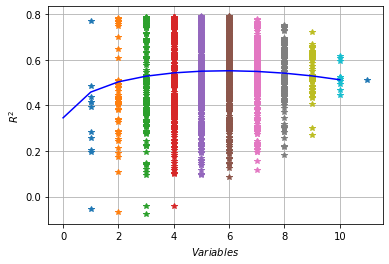

In [16]:
m = np.arange(0,11)

regresion = sklearn.linear_model.LinearRegression()

R2 = [[] for x in range(11)]
# print(R2)
r_max = 0
ii = 0
bb = 0

for i in range(0,len(m)):
    b = np.array(list(itertools.combinations(m, i+1)))
    for j in b:
        X_tt = X_train[:,j]
        X_ttest = X_test[:,j]
        regresion.fit(X_tt, Y_train)
        ERR = regresion.score(X_ttest, Y_test)
        R2[i].append(ERR)
        if (ERR > r_max):
            r_max = ERR
            bb = j

Rav = []    
for i in range(11):
    Rav.append(np.average(R2[i]))
    plt.plot((i+1)*np.ones(len(R2[i])),R2[i],"*")

X_tt = X_train[:,bb]
X_ttest = X_test[:,bb]            
regresion.fit(X_tt, Y_train)

ii = np.argsort(np.abs(regresion.coef_))
for i in ii:
    print(columns[i], regresion.coef_[i])
    
    
plt.plot(m,Rav,"b")
plt.xlabel(r'$Variables$')
plt.ylabel(r'$R^2$')
plt.grid()
plt.savefig("nparams.png")
plt.show()

###  LASSO

MPG.highway -0.0
EngineSize 0.0
Rev.per.mile 0.0
RPM -0.13590788492045205
MPG.city -0.15634812922780794
Weight 1.3552601520198522
Fuel.tank.capacity 1.4531083985489368
Length 1.6822832459283177
Width -1.8417306172273855
Turn.circle -2.2670953549862465
Horsepower 5.892425876718221


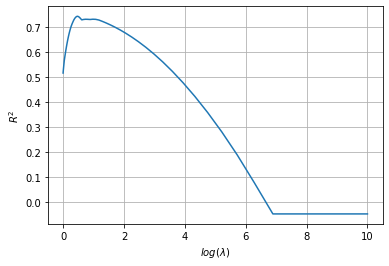

In [11]:
alpha = np.logspace(-3,1,100)
R2 = []
Rr2 = 0
ii = 0

for i in alpha:
    lasso = sklearn.linear_model.Lasso(alpha=i)
    lasso.fit(X_train, Y_train)
    ERR = lasso.score(X_test, Y_test)
    R2.append(ERR)
    if (ERR > Rr2):
        Rr2 = ERR
        ii = i

lasso = sklearn.linear_model.Lasso(alpha=ii)
lasso.fit(X_train, Y_train)
# print(lasso.coef_, lasso.intercept_)

ii = np.argsort(np.abs(lasso.coef_))
for i in ii:
    print(columns[i], lasso.coef_[i])


plt.plot(alpha,R2)
plt.xlabel(r'$log(\lambda)$')
plt.ylabel(r'$R^2$')
plt.grid()
plt.savefig("lasso.png")
plt.show()